In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
# Import functions:
from Function import get_data
import pandas as pd

In [3]:
#Create connection to database:
mongo_client = get_data.get_client()

In [4]:
# Call metastock data:
meta_data = get_data.get_datbase(mongo_client,data_source='metastock')
meta_data

Collection(Database(MongoClient(host=['ac-vqfd6j0-shard-00-00.yvr1go5.mongodb.net:27017', 'ac-vqfd6j0-shard-00-01.yvr1go5.mongodb.net:27017', 'ac-vqfd6j0-shard-00-02.yvr1go5.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-139owh-shard-0', tls=True, tlscafile='D:\\Anaconda\\lib\\site-packages\\certifi\\cacert.pem'), 'data'), 'metastock')

In [5]:
trading_data = get_data.get_datbase(mongo_client,data_source='tradingview')
trading_data

Collection(Database(MongoClient(host=['ac-vqfd6j0-shard-00-00.yvr1go5.mongodb.net:27017', 'ac-vqfd6j0-shard-00-01.yvr1go5.mongodb.net:27017', 'ac-vqfd6j0-shard-00-02.yvr1go5.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-139owh-shard-0', tls=True, tlscafile='D:\\Anaconda\\lib\\site-packages\\certifi\\cacert.pem'), 'data'), 'tradingview')

In [6]:
df = get_data.fetch_meta(symbol= "VNINDEX",mongo_data=meta_data,
                           type_='EOD', kind='index',marketdivision='',
                           start='2000/01/01',stop='now')

In [28]:
sector_tickers = {
    "8300": "Ngân hàng",
    "8600": "Bất Động Sản",
    "8900": "Chứng khoán"}


In [29]:
for key in sector_tickers:
    ticker, desc = key, sector_tickers[key]

In [31]:
price_column = "close"
date_column = "date"

In [32]:
sp_data = get_data.fetch_meta(symbol= "VNINDEX",mongo_data=meta_data,
                           type_='EOD', kind='index',marketdivision='',
                           start='2010/01/01',stop='now')
normal_sp_close = (sp_data['close'] - sp_data['close'].min())/ \
                  (sp_data['close'].max() - sp_data['close'].min())

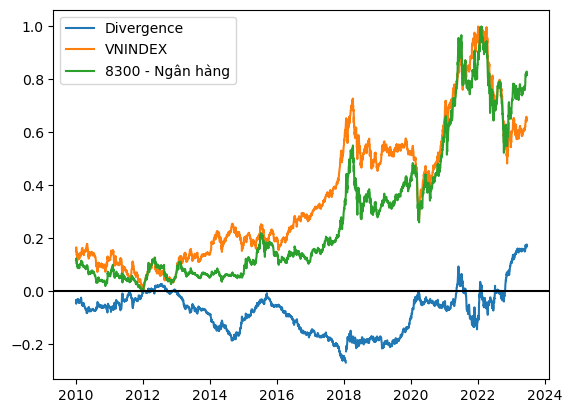

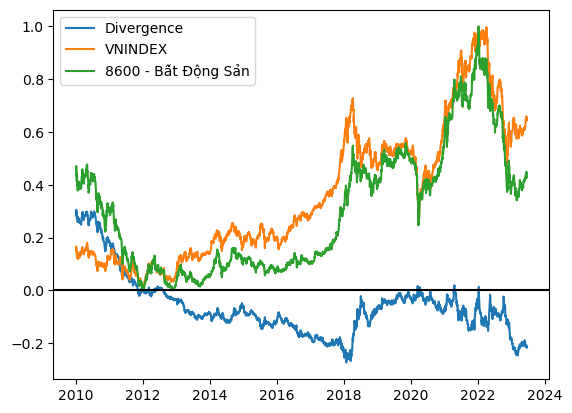

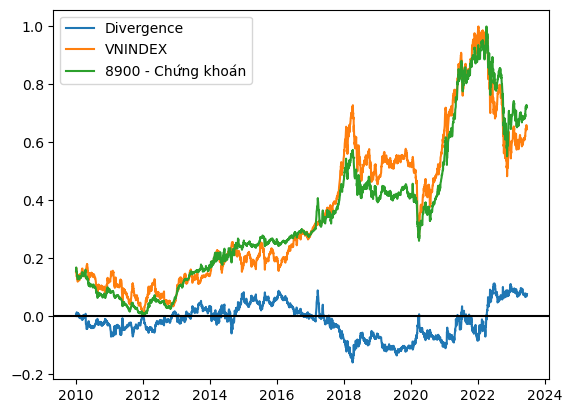

In [38]:
for key in sector_tickers:
    ticker, desc = key, sector_tickers[key]
    comp_data = get_data.fetch_meta(symbol= ticker,mongo_data=meta_data,
                           type_='EOD', kind='industry',marketdivision='',
                           start='2010/01/01',stop='now')
    normal_comp_data = (comp_data['close'] - comp_data['close'].min())/ \
                       (comp_data['close'].max() - comp_data['close'].min())
    divergence = normal_comp_data - normal_sp_close
    ## Divergence = 0 -> no divergence between S&P and Sector (or stock)
    ## Divergence < 0 -> sector gains less than S&P gains (sector may be undervalued)
    ## Divergence > 0 -> sector gains greater than S&P gains (sector may be overvalued)
    div, = plt.plot(comp_data.index, divergence, label="Divergence")
    sp, = plt.plot(sp_data.index, normal_sp_close, label="VNINDEX")
    comp, = plt.plot(comp_data.index, normal_comp_data, label="{} - {}".format(key, desc))
    plt.legend(handles=[div, sp, comp])
    plt.axhline(0, color="black")
#     plt.savefig("DiscountedSectors/plots/{}.png".format(ticker))
#     plt.clf()
    plt.show()